In [1]:
#pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')
min_max_scale_data=pd.read_csv('min_max_resampled_with_encoding.csv')

### Data with Resampling and without OneHotEncoding

### Adaboost with base model as RandomForestClassifier

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [5]:
clf = RandomForestClassifier(random_state=48)
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1,random_state=48)
# Train Adaboost Classifer
start_time = timeit.default_timer()
model = abc.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = model.predict(X_test)

Time taken to fit the model in sec is  1317.0476422000002


In [6]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9811
F1 score : 0.9808
Recall score : 0.9627
Precision score : 0.9996


<AxesSubplot:>

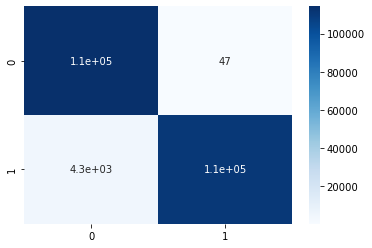

In [7]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='Blues')

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



### Adaboost with base model as DecisionTreeClassifier

In [12]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [13]:
clf = DecisionTreeClassifier(random_state=23)
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1,random_state=48)
# Train Adaboost Classifer
start_time = timeit.default_timer()
model = abc.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = model.predict(X_test)

Time taken to fit the model in sec is  25.89680260000023


In [14]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9448
F1 score : 0.9456
Recall score : 0.9579
Precision score : 0.9337


<AxesSubplot:>

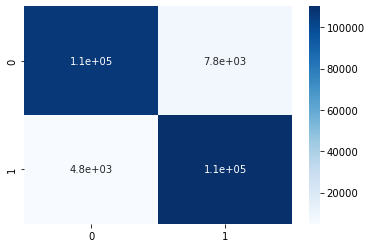

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='Blues')

In [16]:
clf = DecisionTreeClassifier(random_state=23)
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=100,learning_rate=1,random_state=48)
# Train Adaboost Classifer
start_time = timeit.default_timer()
model = abc.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = model.predict(X_test)

Time taken to fit the model in sec is  26.307148799999595


In [17]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9448
F1 score : 0.9456
Recall score : 0.9579
Precision score : 0.9337


### XGBoost Classifier

In [18]:
model1 =xgb.XGBClassifier( 
                      learning_rate=0.06,  
                      colsample_bytree = 0.6,
                      subsample = 0.8, 
                      n_estimators=200,                       
                      max_depth=3, 
                      gamma=0)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [19]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score: 0.9684
F1 score : 0.9678
Recall score : 0.9454
Precision score : 0.9912


<AxesSubplot:>

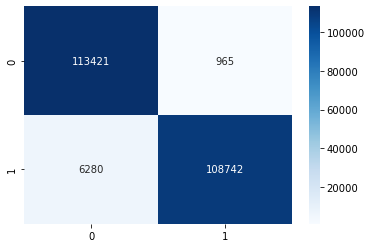

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True, cmap='Blues')

In [21]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    114386
           1       0.99      0.95      0.97    115022

    accuracy                           0.97    229408
   macro avg       0.97      0.97      0.97    229408
weighted avg       0.97      0.97      0.97    229408



### Data with Resampling and with OneHotEncoding

### Adaboost with base model as RandomForestClassifier

In [3]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [23]:
clf = RandomForestClassifier(random_state=48)
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
start_time = timeit.default_timer()
model = abc.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = model.predict(X_test)

Time taken to fit the model in sec is  1409.2733274999991


In [24]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9803
F1 score : 0.9800
Recall score : 0.9620
Precision score : 0.9987


<AxesSubplot:>

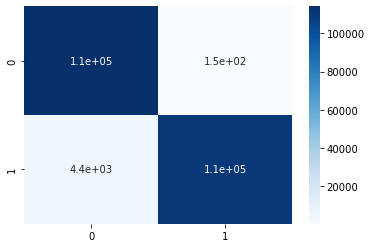

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='Blues')

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



### Adaboost with base model as DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(random_state=23)
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1,random_state=48)
# Train Adaboost Classifer
start_time = timeit.default_timer()
model = abc.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = model.predict(X_test)

Time taken to fit the model in sec is  62.984180900000865


In [28]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9464
F1 score : 0.9471
Recall score : 0.9567
Precision score : 0.9376


### XGB Classifier

In [30]:
model1 =xgb.XGBClassifier( 
                      learning_rate=0.06,  
                      colsample_bytree = 0.6,
                      subsample = 0.8, 
                      n_estimators=200,                       
                      max_depth=3, 
                      gamma=0)
start_time = timeit.default_timer()
model1.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
y_pred1 = model1.predict(X_test)

In [31]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score: 0.9674
F1 score : 0.9667
Recall score : 0.9444
Precision score : 0.9901


<AxesSubplot:>

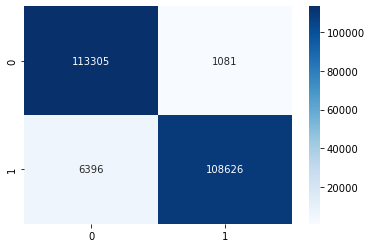

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,cmap='Blues')

In [33]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    114386
           1       0.99      0.94      0.97    115022

    accuracy                           0.97    229408
   macro avg       0.97      0.97      0.97    229408
weighted avg       0.97      0.97      0.97    229408



### GradientBoostClassifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=48)
start_time = timeit.default_timer()
gbc.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred = gbc.predict(X_test)

Time taken to fit the model in sec is  1326.3653578000012


In [38]:
gbc.score(X_test,y_test)

0.957346735946436

In [39]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9573
F1 score : 0.9564
Recall score : 0.9320
Precision score : 0.9820


<AxesSubplot:>

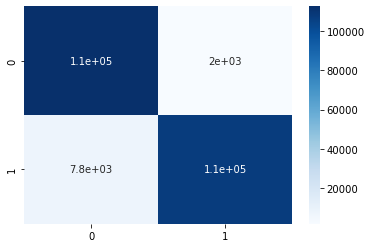

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    114386
           1       0.98      0.93      0.96    115022

    accuracy                           0.96    229408
   macro avg       0.96      0.96      0.96    229408
weighted avg       0.96      0.96      0.96    229408

